Text(0.5, 0, '')

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129365 (\N{CARROT}) missing from current font.
  func(*args, **kwargs)


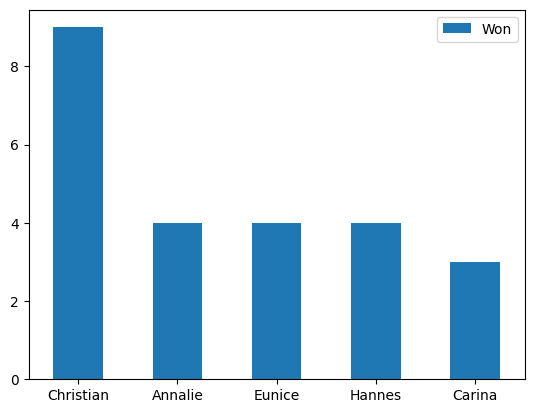

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129365 (\N{CARROT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


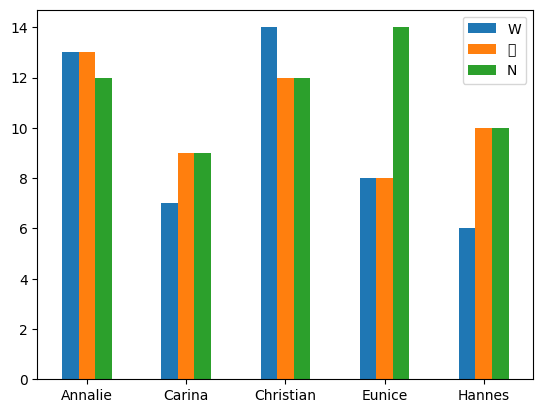

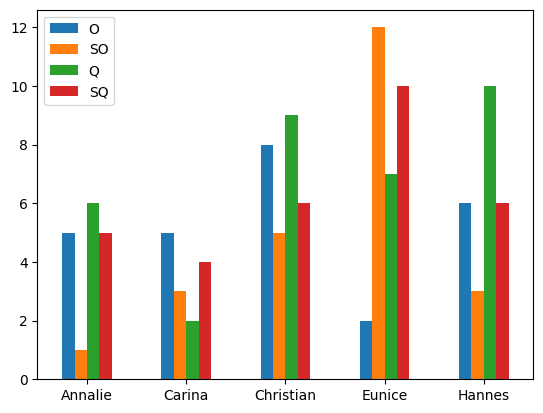

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

rename = {
    "golds":                 "Golds",
    "octordleTurns":         "O turns",
    "octordleMedal":         "O",
    "sequenceOctordleTurns": "SO Turns",
    "sequenceOctordleMedal": "SO",
    "quordleTurns":          "Q Turns",
    "quordleMedal":          "Q",
    "sequenceQuordleTurns":  "SQ Turns",
    "sequenceQuordleMedal":  "SQ",
    "wordleTurns":           "W Turns",
    "wordleMedal":           "W",
    "wortelTurns":           "🥕 Turns",
    "wortelMedal":           "🥕",
    "nerdleTurns":           "N Turns",
    "nerdleMedal":           "N",
    "position":              "Won",
}

day_0 = datetime.datetime(2021, 6, 19)
start_date = datetime.datetime.now().replace(day=1)
end_date = (start_date + datetime.timedelta(days=32)).replace(day=1)
game_start = (start_date - day_0).days
game_end = (end_date - day_0).days

df = pd.read_json("../data/wordle.json").rename(
    columns=rename
)
df['first_name'] = df['name'].transform(lambda x: x.split()[0])
month_df = df[(df["day"] >= game_start) & (df["day"] < game_end)]
grouped = month_df.groupby("first_name")
days = grouped.agg(
    {
        "Won": lambda x: (x == 1).sum(),
    }
)

wordles = grouped.agg(
    {
        "W": lambda x: (x == "G").sum(),
        "🥕": lambda x: (x == "G").sum(),
        "N": lambda x: (x == "G").sum(),
    }
)

octorldles = grouped.agg(
    {
        "O": lambda x: (x == "G").sum(),
        "SO": lambda x: (x == "G").sum(),
        "Q": lambda x: (x == "G").sum(),
        "SQ": lambda x: (x == "G").sum(),
    }
)

print(octorldles)

sorted = days.sort_values(by=["Won"], ascending=False)
sorted.plot(kind="bar", rot=0)
plt.xlabel("")
wordles.plot(kind="bar", rot=0)
plt.xlabel("")
octorldles.plot(kind="bar", rot=0)
plt.xlabel("")
# plt.show()